In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn import preprocessing
import torch
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
!pip install gpytorch
import gpytorch

     |████████████████████████████████| 310 kB 9.4 MB/s 
  Created wheel for gpytorch: filename=gpytorch-1.6.0-py2.py3-none-any.whl size=509889 sha256=58034b428b6d23c801684f56cdcc6bd20e6d6a4f9b12d7763ae58173d548371b
  Stored in directory: /root/.cache/pip/wheels/66/b5/89/34c06ad393a6feb72b4cdde46d0f1c667f3e2632960f9df109
Successfully built gpytorch


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv ('new-data.csv')
# covid_data = pd.read_csv ('covid-cases.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/new-data.csv')
covid_data = pd.read_csv('/content/drive/MyDrive/covid-cases.csv')

In [ ]:
# Drop columns

columns_to_drop = ['facility_name','street_address','city_x','zip_code','able_to_maintain_ventilator_supplies',
                   'able_to_maintain_ventilator_medications','able_to_maintain_n95_masks','able_to_maintain_paprs',
                   'able_to_maintain_surgical_masks','able_to_maintain_eye_protection',
                   'able_to_maintain_single_use_gowns','able_to_maintain_gloves',
                   'able_to_maintain_lab_nasal_pharyngeal_swabs','able_to_maintain_lab_nasal_swabs',
                   'able_to_maintain_lab_viral_transport_media','hospital_pk','state_y','hospital_name','address',
                   'city_y','zip','total_beds_7_day_avg','all_adult_hospital_beds_7_day_avg',
                   'all_adult_hospital_inpatient_beds_7_day_avg','inpatient_beds_used_7_day_avg',
                   'all_adult_hospital_inpatient_bed_occupied_7_day_avg',
                   'inpatient_beds_used_covid_7_day_avg',
                   'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
                   'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
                   'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
                   'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg',
                   'inpatient_beds_7_day_avg','total_icu_beds_7_day_avg',
                   'total_staffed_adult_icu_beds_7_day_avg','icu_beds_used_7_day_avg',
                   'staffed_adult_icu_bed_occupancy_7_day_avg',
                   'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg',
                   'staffed_icu_adult_patients_confirmed_covid_7_day_avg',
                   'total_patients_hospitalized_confirmed_influenza_7_day_avg',
                   'icu_patients_confirmed_influenza_7_day_avg',
                   'total_patients_hospitalized_confirmed_influenza_and_covid_7_day_avg',
                   'all_adult_hospital_beds_7_day_sum','all_adult_hospital_inpatient_beds_7_day_sum',
                   'all_adult_hospital_inpatient_bed_occupied_7_day_sum','inpatient_beds_used_covid_7_day_sum',
                   'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum',
                   'total_adult_patients_hospitalized_confirmed_covid_7_day_sum',
                   'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum',
                   'total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum','inpatient_beds_7_day_sum',
                   'total_staffed_adult_icu_beds_7_day_sum','staffed_adult_icu_bed_occupancy_7_day_sum',
                   'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum',
                   'staffed_icu_adult_patients_confirmed_covid_7_day_sum',
                   'total_patients_hospitalized_confirmed_influenza_7_day_sum',
                   'icu_patients_confirmed_influenza_7_day_sum',
                   'total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum']

df.drop(columns_to_drop,inplace=True,axis=1)
df.head(1)

,state_x,ccn,collection_week,able_to_obtain_ventilator_supplies,able_to_obtain_ventilator_medications,able_to_obtain_n95_masks,able_to_obtain_paprs,able_to_obtain_surgical_masks,able_to_obtain_eye_protection,able_to_obtain_single_use_gowns,able_to_obtain_gloves,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,total_icu_beds_7_day_sum,icu_beds_used_7_day_sum
0,FL,100001,9/3/21,True,True,True,True,True,True,True,True,4095.0,4219.0,868,809.0


In [ ]:
# change booleans to 0/1
print(df.iloc[154])
df.iloc[:, 3:11] = df.iloc[:, 3:11].astype(int)
print(df.iloc[154])

state_x                                      FL
ccn                                      100298
collection_week                          9/3/21
able_to_obtain_ventilator_supplies        False
able_to_obtain_ventilator_medications     False
able_to_obtain_n95_masks                  False
able_to_obtain_paprs                      False
able_to_obtain_surgical_masks             False
able_to_obtain_eye_protection             False
able_to_obtain_single_use_gowns           False
able_to_obtain_gloves                     False
total_beds_7_day_sum                      308.0
inpatient_beds_used_7_day_sum              40.0
total_icu_beds_7_day_sum                      0
icu_beds_used_7_day_sum                     0.0
Name: 154, dtype: object
state_x                                      FL
ccn                                      100298
collection_week                          9/3/21
able_to_obtain_ventilator_supplies            0
able_to_obtain_ventilator_medications         0
able_to_obtain_

In [ ]:
# change all negative values to 0
print(df.iloc[524])
df.iloc[:, 11:] = df.iloc[:, 11:].clip(lower=0)
print(df.iloc[524])
df.head()

state_x                                        ID
ccn                                        131324
collection_week                            9/3/21
able_to_obtain_ventilator_supplies              1
able_to_obtain_ventilator_medications           1
able_to_obtain_n95_masks                        1
able_to_obtain_paprs                            1
able_to_obtain_surgical_masks                   1
able_to_obtain_eye_protection                   1
able_to_obtain_single_use_gowns                 1
able_to_obtain_gloves                           1
total_beds_7_day_sum                         98.0
inpatient_beds_used_7_day_sum           -999999.0
total_icu_beds_7_day_sum                        0
icu_beds_used_7_day_sum                       0.0
Name: 524, dtype: object
state_x                                      ID
ccn                                      131324
collection_week                          9/3/21
able_to_obtain_ventilator_supplies            1
able_to_obtain_ventilator_medicat

,state_x,ccn,collection_week,able_to_obtain_ventilator_supplies,able_to_obtain_ventilator_medications,able_to_obtain_n95_masks,able_to_obtain_paprs,able_to_obtain_surgical_masks,able_to_obtain_eye_protection,able_to_obtain_single_use_gowns,able_to_obtain_gloves,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,total_icu_beds_7_day_sum,icu_beds_used_7_day_sum
0,FL,100001,9/3/21,1,1,1,1,1,1,1,1,4095.0,4219.0,868,809.0
1,FL,100002,9/3/21,1,1,1,1,1,1,1,1,3367.0,2154.0,483,353.0
2,FL,100006,9/3/21,1,1,1,1,1,1,1,1,12671.0,9896.0,2102,1909.0
3,FL,100007,9/3/21,1,1,1,1,1,1,1,1,28126.0,16924.0,3304,3647.0
4,FL,100008,9/3/21,1,1,1,1,1,1,1,1,5243.0,4603.0,896,719.0


In [ ]:
df = df.groupby(['state_x', 'collection_week']).agg({'able_to_obtain_ventilator_supplies': 'mean',
                                                'able_to_obtain_ventilator_medications': 'mean',
                                                'able_to_obtain_n95_masks': 'mean',
                                                'able_to_obtain_paprs' : 'mean',
                                                'able_to_obtain_surgical_masks' : 'mean',
                                                'able_to_obtain_eye_protection': 'mean',
                                                'able_to_obtain_single_use_gowns': 'mean',
                                                'able_to_obtain_gloves': 'mean',
                                                'total_beds_7_day_sum' : 'sum',
                                                'inpatient_beds_used_7_day_sum' : 'sum',
                                                'total_icu_beds_7_day_sum': 'sum',
                                                'icu_beds_used_7_day_sum':'sum'
                                                })

In [ ]:
df = df.reset_index()
df.head()

,state_x,collection_week,able_to_obtain_ventilator_supplies,able_to_obtain_ventilator_medications,able_to_obtain_n95_masks,able_to_obtain_paprs,able_to_obtain_surgical_masks,able_to_obtain_eye_protection,able_to_obtain_single_use_gowns,able_to_obtain_gloves,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,total_icu_beds_7_day_sum,icu_beds_used_7_day_sum
0,AS,1/14/22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,524.0,49,28.0
1,AS,1/21/22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,579.0,49,30.0
2,AS,1/28/22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,502.0,49,22.0
3,AS,1/7/22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,300.0,483.0,49,23.0
4,AS,10/1/21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1050.0,467.0,49,34.0


In [ ]:
## FIND disntinct states in the data

df.state_x.unique() ## 47 states. 

array(['AS', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY',
       'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC',
       'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA',
       'WI', 'WV', 'WY'], dtype=object)

Reference for Geographic Centers: 

https://en.wikipedia.org/wiki/List_of_geographic_centers_of_the_United_States

In [ ]:
latitude_dict = {'AS': -13.8517, 'FL': 28.6305, 'GA': 32.6415, 'GU': 12.9770, 'HI': 20.2927, 'IA': 42.0751, 
                 'ID': 44.3509, 'IL': 40.0417, 'IN': 39.8942, 'KS': 38.4937, 'KY': 37.5347, 'LA': 31.0689, 
                 'MA': 42.2596, 'MD': 39.0550, 'ME': 45.3695, 'MI': 44.3467, 'MN': 46.2807, 'MO': 38.3566, 
                 'MS': 32.7364, 'MT': 47.0527, 'NC': 35.5557, 'ND': 47.4501, 'NE': 41.5378, 'NH': 43.6805,
                 'NJ': 40.1907, 'NM': 34.4071, 'NV': 39.3289, 'NY': 42.9538, 'OH': 40.2862, 'OK': 35.5889, 
                 'OR': 43.9336, 'PA': 40.8781, 'PR': 18.2223, 'RI': 41.6762, 'SC': 33.9169, 'SD': 44.4443, 
                 'TN': 35.8580, 'TX': 31.4757, 'UT': 39.3055, 'VA': 37.5215, 'VI': 18.34, 'VT': 44.0687, 
                 'WA': 47.3826, 'WI': 44.6243, 'WV': 38.6409, 'WY': 42.9957}

In [ ]:
longitude_dict = {'AS': 169.0576, 'FL': 82.4497, 'GA': 83.4426, 'GU': -143.5814, 'HI': 156.3737, 'IA': 93.4960, 
                  'ID': 114.6130, 'IL': 89.1965, 'IN': 86.2816, 'KS': 98.3804, 'KY': 85.3021, 'LA': 91.9968, 
                  'MA': 71.8083, 'MD': 76.7909, 'ME': 69.2428, 'MI': 85.4102, 'MN': 94.3053, 'MO': 92.4580, 
                  'MS': 89.6678, 'MT': 109.6333, 'NC': 79.3877, 'ND': 100.4659, 'NE': 99.7951, 'NH': 71.5811, 
                  'NJ': 74.6728, 'NM': 106.1126, 'NV': 116.6312, 'NY': 75.5268, 'OH': 82.7937, 'OK': 97.4943,
                  'OR': 120.5583, 'PA': 77.7996, 'PR': 66.4303, 'RI': 71.5562, 'SC': 80.8964, 'SD': 100.2263,
                  'TN': 86.3505, 'TX': 99.3312, 'UT': 111.6703, 'VA': 78.8537, 'VI': 64.90, 'VT': 72.6658,
                  'WA': 120.4472, 'WI': 89.9941, 'WV': 80.6227, 'WY': 107.5512}

In [ ]:
def get_latitute(state):
  return latitude_dict[state]

def get_longitute(state):
  return longitude_dict[state]


In [ ]:
df = df[df.state_x != "MP"]
df['latitude'] = df.apply (lambda row: get_latitute(row.state_x), axis=1)
df['longitude'] = df.apply (lambda row: get_longitute(row.state_x), axis=1)
df.head()

,state_x,collection_week,able_to_obtain_ventilator_supplies,able_to_obtain_ventilator_medications,able_to_obtain_n95_masks,able_to_obtain_paprs,able_to_obtain_surgical_masks,able_to_obtain_eye_protection,able_to_obtain_single_use_gowns,able_to_obtain_gloves,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,total_icu_beds_7_day_sum,icu_beds_used_7_day_sum,latitude,longitude
0,AS,1/14/22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,524.0,49,28.0,-13.8517,169.0576
1,AS,1/21/22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,579.0,49,30.0,-13.8517,169.0576
2,AS,1/28/22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,502.0,49,22.0,-13.8517,169.0576
3,AS,1/7/22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,300.0,483.0,49,23.0,-13.8517,169.0576
4,AS,10/1/21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1050.0,467.0,49,34.0,-13.8517,169.0576


In [ ]:
# get new cases from covid-cases.csv
drop_columns = ["tot_cases", "conf_cases", "prob_cases", "pnew_case", "tot_death", "conf_death",
                "prob_death", "new_death", "pnew_death", "created_at", "consent_cases", "consent_deaths"]
covid_data.drop(drop_columns, inplace=True, axis=1)
covid_data['submission_date'] = pd.to_datetime(covid_data['submission_date'])
covid_data["new_case"] = covid_data["new_case"].clip(lower=0)
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48840 entries, 0 to 48839
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  48840 non-null  datetime64[ns]
 1   state            48840 non-null  object        
 2   new_case         48840 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
# consolidate covid cases by state and date
covid_data = covid_data.groupby(['state', pd.Grouper(key='submission_date', freq='W-FRI')])['new_case'].sum().reset_index()
covid_data

,state,submission_date,new_case
0,AK,2020-01-24,0
1,AK,2020-01-31,0
2,AK,2020-02-07,0
3,AK,2020-02-14,0
4,AK,2020-02-21,0
...,...,...,...
7015,WY,2022-03-18,163
7016,WY,2022-03-25,149
7017,WY,2022-04-01,111
7018,WY,2022-04-08,114


In [ ]:
# add covid case column to data
covid_data = covid_data.rename(columns={"state": "state_x", "submission_date": "collection_week"})
df['collection_week'] = pd.to_datetime(df['collection_week'])
df = df.merge(covid_data, on=["state_x", "collection_week"])
df

,state_x,collection_week,able_to_obtain_ventilator_supplies,able_to_obtain_ventilator_medications,able_to_obtain_n95_masks,able_to_obtain_paprs,able_to_obtain_surgical_masks,able_to_obtain_eye_protection,able_to_obtain_single_use_gowns,able_to_obtain_gloves,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,total_icu_beds_7_day_sum,icu_beds_used_7_day_sum,latitude,longitude,new_case
0,AS,2022-01-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,524.0,49,28.0,-13.8517,169.0576,0
1,AS,2022-01-21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,579.0,49,30.0,-13.8517,169.0576,7
2,AS,2022-01-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,502.0,49,22.0,-13.8517,169.0576,0
3,AS,2022-01-07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300.0,483.0,49,23.0,-13.8517,169.0576,0
4,AS,2021-10-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1050.0,467.0,49,34.0,-13.8517,169.0576,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,WY,2022-03-04,0.000000,0.000000,0.791667,0.791667,0.791667,0.791667,0.791667,0.791667,7496.0,3627.0,810,274.0,42.9957,107.5512,517
1366,WY,2021-09-10,0.961538,0.961538,0.961538,0.961538,0.961538,0.961538,0.961538,0.961538,30945.0,14370.0,2742,1851.0,42.9957,107.5512,3437
1367,WY,2021-09-17,0.961538,0.961538,0.961538,0.961538,0.961538,0.961538,0.961538,0.961538,10217.0,4638.0,909,596.0,42.9957,107.5512,3315
1368,WY,2021-09-24,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20444.0,9682.0,1858,1358.0,42.9957,107.5512,3908


In [ ]:
reference_time = pd.to_datetime("2021-09-03")
df["collection_week"] = (df["collection_week"] - reference_time) / pd.Timedelta(7, "D")
df.head()

,state_x,collection_week,able_to_obtain_ventilator_supplies,able_to_obtain_ventilator_medications,able_to_obtain_n95_masks,able_to_obtain_paprs,able_to_obtain_surgical_masks,able_to_obtain_eye_protection,able_to_obtain_single_use_gowns,able_to_obtain_gloves,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,total_icu_beds_7_day_sum,icu_beds_used_7_day_sum,latitude,longitude,new_case
0,AS,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,524.0,49,28.0,-13.8517,169.0576,0
1,AS,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,579.0,49,30.0,-13.8517,169.0576,7
2,AS,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,502.0,49,22.0,-13.8517,169.0576,0
3,AS,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,300.0,483.0,49,23.0,-13.8517,169.0576,0
4,AS,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1050.0,467.0,49,34.0,-13.8517,169.0576,0


In [ ]:
df.shape

(1370, 17)

In [ ]:
#shift the target rows one unit up 
#the target become "able to obtain medical resource fro next week"
state_list = df.state_x.unique()
new_df = pd.DataFrame()
for i in state_list:
  temp = df[df['state_x']==i].sort_values(by = 'collection_week').reset_index(drop = True)
  #print('temp shape is: ',temp.shape)
  temp_shift = temp.iloc[:,2:10].shift(periods = -1)
  columns = list(temp_shift.columns.values.tolist())
  temp[columns] = temp_shift[columns]
  temp = temp.iloc[:-1,:]
  #print('temp shape after shifting is: ',temp.shape)
  new_df = pd.concat([new_df,temp])

new_df.shape

(1324, 17)

In [ ]:
df = new_df.reset_index().iloc[:,1:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   state_x                                1324 non-null   object 
 1   collection_week                        1324 non-null   float64
 2   able_to_obtain_ventilator_supplies     1324 non-null   float64
 3   able_to_obtain_ventilator_medications  1324 non-null   float64
 4   able_to_obtain_n95_masks               1324 non-null   float64
 5   able_to_obtain_paprs                   1324 non-null   float64
 6   able_to_obtain_surgical_masks          1324 non-null   float64
 7   able_to_obtain_eye_protection          1324 non-null   float64
 8   able_to_obtain_single_use_gowns        1324 non-null   float64
 9   able_to_obtain_gloves                  1324 non-null   float64
 10  total_beds_7_day_sum                   1324 non-null   float64
 11  inpa

In [ ]:
# drop rows with 0 total beds
df = df[df.total_beds_7_day_sum != 0]
df = df[df.total_icu_beds_7_day_sum != 0]

# find ratio of beds used/total beds
df["inpatient_beds_used_7_day_sum"] = df["inpatient_beds_used_7_day_sum"] / df["total_beds_7_day_sum"]
df["icu_beds_used_7_day_sum"] = df["icu_beds_used_7_day_sum"] / df["total_icu_beds_7_day_sum"]

# drop original total beds columns
df = df.drop(["total_beds_7_day_sum", "total_icu_beds_7_day_sum"], axis=1)

# drop rows with more beds than total beds
df = df[df.inpatient_beds_used_7_day_sum < 1]
df = df[df.icu_beds_used_7_day_sum < 1]

# normalize beds used columns
df.iloc[:,10:12] = df.iloc[:,10:12].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

#divide lat/long by 180
df.iloc[:,12:] = df.iloc[:,12:] / 180

df = df.reset_index().iloc[:,1:]
print(df.shape)
df.to_csv('/content/drive/MyDrive/processed_data.csv')

(1092, 15)


In [ ]:
df

,state_x,collection_week,able_to_obtain_ventilator_supplies,able_to_obtain_ventilator_medications,able_to_obtain_n95_masks,able_to_obtain_paprs,able_to_obtain_surgical_masks,able_to_obtain_eye_protection,able_to_obtain_single_use_gowns,able_to_obtain_gloves,inpatient_beds_used_7_day_sum,icu_beds_used_7_day_sum,latitude,longitude,new_case
0,AS,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.254400,-0.940814,-0.076954,0.939209,0.000000
1,AS,2.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.484733,-1.446408,-0.076954,0.939209,0.000000
2,AS,3.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.741642,0.238903,-0.076954,0.939209,0.005556
3,AS,4.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.830231,-0.266690,-0.076954,0.939209,0.000000
4,AS,5.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.785937,0.407434,-0.076954,0.939209,0.011111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,WY,24.0,0.0,0.0,0.846154,0.846154,0.846154,0.846154,0.846154,0.846154,-1.595011,-2.601178,0.238865,0.597507,8.338889
1088,WY,25.0,0.0,0.0,0.791667,0.791667,0.791667,0.791667,0.791667,0.791667,-1.605644,-2.936528,0.238865,0.597507,4.594444
1089,WY,26.0,0.0,0.0,0.807692,0.807692,0.807692,0.807692,0.807692,0.807692,-1.466563,-3.203292,0.238865,0.597507,2.872222
1090,WY,27.0,0.0,0.0,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,-1.663208,-2.781040,0.238865,0.597507,1.766667


In [ ]:
state_list = ['AS', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY',
              'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 
              'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR',
              'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI',
              'WV' 'WY']

train_df_ordered = pd.DataFrame()
test_df_ordered = pd.DataFrame()
# no undersampling
# for state in state_list:
#   temp = df.loc[df['state_x'] == state].sort_values(by=['collection_week'])
#   train_df_ordered = pd.concat([train_df_ordered, temp.iloc[:int(temp.shape[0] * 0.8),:]], sort=False)
#   test_df_ordered = pd.concat([test_df_ordered, temp.iloc[int(temp.shape[0] * 0.8):,:]], sort=False)

# with undersampling
train_df_ordered_4 = pd.DataFrame()
train_df_ordered_5 = pd.DataFrame()
for state in state_list:
  temp = df.loc[df['state_x'] == state].sort_values(by=['collection_week'])
  train_df_ordered_4 = pd.concat([train_df_ordered_4, temp.iloc[:int(temp.shape[0] * 4/6),:]], sort=False)
  train_df_ordered_5 = pd.concat([train_df_ordered_5, temp.iloc[int(temp.shape[0] * 4/6):int(temp.shape[0] * 5/6),:]], sort=False)
  test_df_ordered = pd.concat([test_df_ordered, temp.iloc[int(temp.shape[0] * 5/6):,:]], sort=False)
train_df_ordered = pd.concat([train_df_ordered_4.sample(frac=0.25), train_df_ordered_5], ignore_index=True)

# training datasets with time split
train_x_ordered = torch.cat((torch.tensor(train_df_ordered['collection_week'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1), 
                             torch.tensor(train_df_ordered['inpatient_beds_used_7_day_sum'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1),
                             torch.tensor(train_df_ordered['icu_beds_used_7_day_sum'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1),
                             torch.tensor(train_df_ordered['latitude'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1),
                             torch.tensor(train_df_ordered['longitude'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1),
                             torch.tensor(train_df_ordered['new_case'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1)), dim=1)

train_y_ordered = torch.cat((torch.tensor(train_df_ordered['able_to_obtain_ventilator_supplies'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1), 
                             torch.tensor(train_df_ordered['able_to_obtain_ventilator_medications'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1),
                             torch.tensor(train_df_ordered['able_to_obtain_n95_masks'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1),
                             torch.tensor(train_df_ordered['able_to_obtain_paprs'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1),
                             torch.tensor(train_df_ordered['able_to_obtain_surgical_masks'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1),
                             torch.tensor(train_df_ordered['able_to_obtain_eye_protection'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1),
                             torch.tensor(train_df_ordered['able_to_obtain_single_use_gowns'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1),
                             torch.tensor(train_df_ordered['able_to_obtain_gloves'], dtype=torch.float).contiguous().view(train_df_ordered.shape[0], 1)), dim=1)

print(train_x_ordered.shape, train_y_ordered.shape)

torch.Size([341, 6]) torch.Size([341, 8])


In [ ]:
df_random = df.sample(frac=1).reset_index(drop=True)
train_df_random = df_random.iloc[:int(df_random.shape[0] * 0.8),:]
test_df_random = df_random.iloc[int(df_random.shape[0] * 0.8):,:]

# training datasets with random split
train_x_random = torch.cat((torch.tensor(train_df_random['collection_week'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1), 
                            torch.tensor(train_df_random['inpatient_beds_used_7_day_sum'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['icu_beds_used_7_day_sum'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['latitude'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['longitude'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['new_case'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1)), dim=1)

train_y_random = torch.cat((torch.tensor(train_df_random['able_to_obtain_ventilator_supplies'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1), 
                            torch.tensor(train_df_random['able_to_obtain_ventilator_medications'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['able_to_obtain_n95_masks'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['able_to_obtain_paprs'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['able_to_obtain_surgical_masks'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['able_to_obtain_eye_protection'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['able_to_obtain_single_use_gowns'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['able_to_obtain_gloves'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1)), dim=1)

print(train_x_random.shape, train_y_random.shape)

torch.Size([873, 6]) torch.Size([873, 8])


In [ ]:
class MultitaskGPModel(gpytorch.models.ExactGP):
  def __init__(self, train_x, train_y, likelihood):
    super(MultitaskGPModel, self).__init__(train_x, train_y, likelihood)
    self.mean_module = gpytorch.means.MultitaskMean(gpytorch.means.ConstantMean(), num_tasks=8) # num_tasks = number of output dims ## num_tasks = 8 for our task (able to obtain dimensions)
    self.covar_module = gpytorch.kernels.MultitaskKernel(gpytorch.kernels.RBFKernel(ard_num_dims=6), num_tasks=8) # ard_num_dims = input dims, num_tasks = output dims ## ard_num_dims = our number of input dimensions (week, state, lat, long, inpatient beds, etc)

  def forward(self, x):
    mean_x = self.mean_module(x)
    covar_x = self.covar_module(x)
    return gpytorch.distributions.MultitaskMultivariateNormal(mean_x, covar_x)

likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=8) # num_tasks = output dims
model = MultitaskGPModel(train_x_ordered, train_y_ordered, likelihood)

In [ ]:
# find model hyperparameters
model.train()
likelihood.train()

# adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.05) ## modify lr and experiment

# marginal log likelihood loss
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model) ## we can change mll

# training
for i in range(100): #epochs = 100
  optimizer.zero_grad()
  output = model(train_x_ordered.float())
  loss = -mll(output, train_y_ordered.float())
  loss.backward()
  print(f"Iter {i}/100 - Loss: {loss.item()}")
  optimizer.step()

Iter 0/100 - Loss: 1.6195014715194702
Iter 1/100 - Loss: 1.587709903717041
Iter 2/100 - Loss: 1.5561641454696655
Iter 3/100 - Loss: 1.5253534317016602
Iter 4/100 - Loss: 1.495002031326294
Iter 5/100 - Loss: 1.4652138948440552
Iter 6/100 - Loss: 1.43558931350708
Iter 7/100 - Loss: 1.4067472219467163
Iter 8/100 - Loss: 1.378226399421692
Iter 9/100 - Loss: 1.3496017456054688
Iter 10/100 - Loss: 1.3219207525253296
Iter 11/100 - Loss: 1.294028401374817
Iter 12/100 - Loss: 1.2668979167938232
Iter 13/100 - Loss: 1.2395946979522705
Iter 14/100 - Loss: 1.2128913402557373
Iter 15/100 - Loss: 1.1863828897476196
Iter 16/100 - Loss: 1.159976840019226
Iter 17/100 - Loss: 1.1340991258621216
Iter 18/100 - Loss: 1.1086283922195435
Iter 19/100 - Loss: 1.0831130743026733
Iter 20/100 - Loss: 1.0580154657363892
Iter 21/100 - Loss: 1.0331820249557495
Iter 22/100 - Loss: 1.0081889629364014
Iter 23/100 - Loss: 0.983521580696106
Iter 24/100 - Loss: 0.9585864543914795
Iter 25/100 - Loss: 0.933432400226593
Iter 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

WVWY


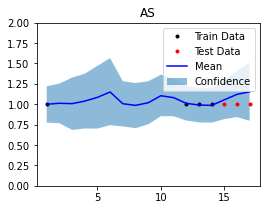

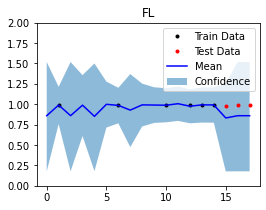

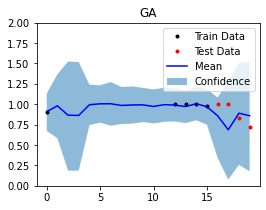

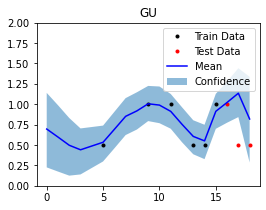

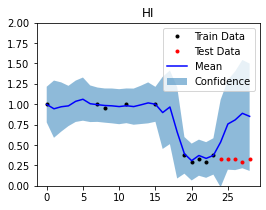

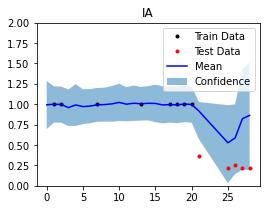

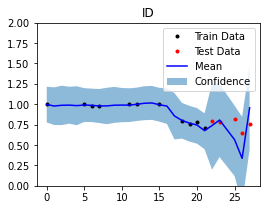

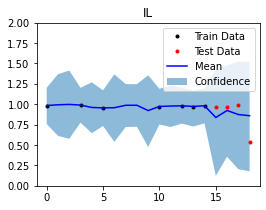

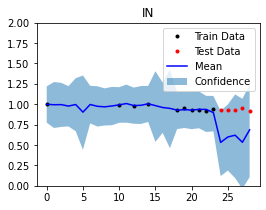

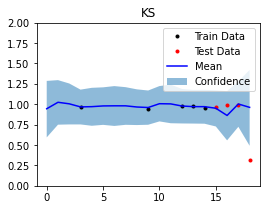

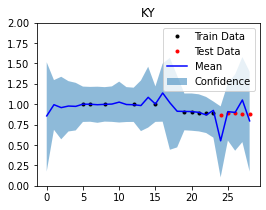

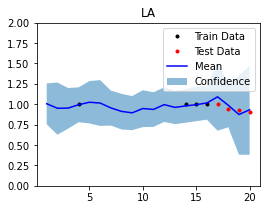

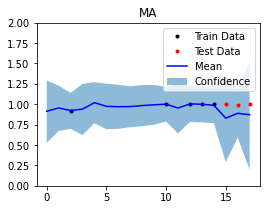

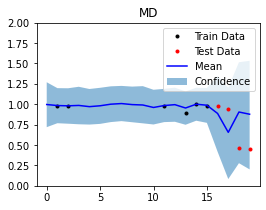

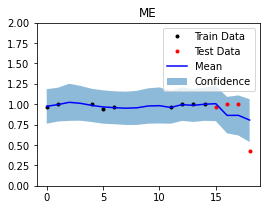

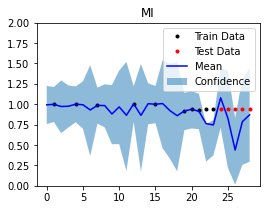

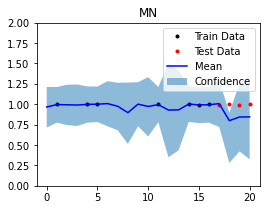

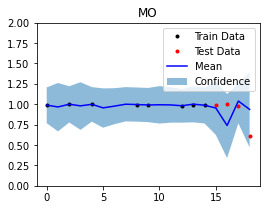

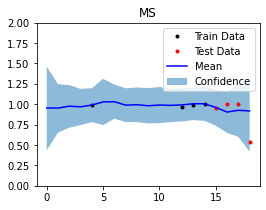

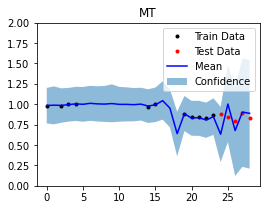

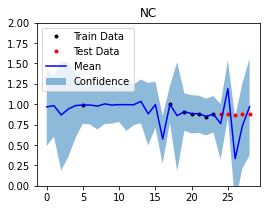

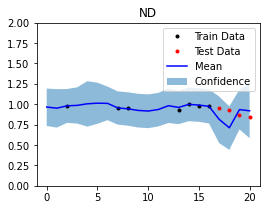

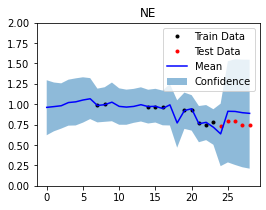

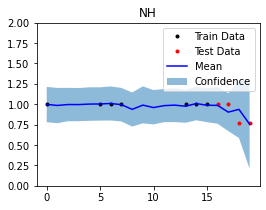

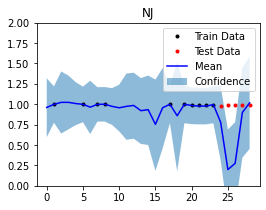

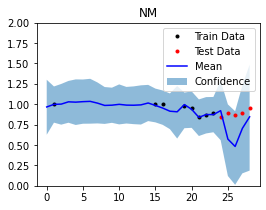

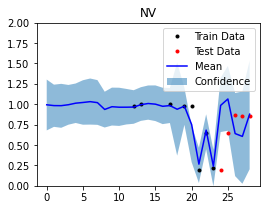

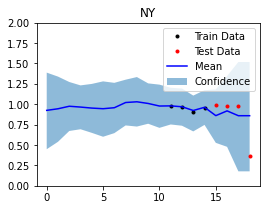

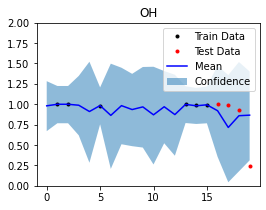

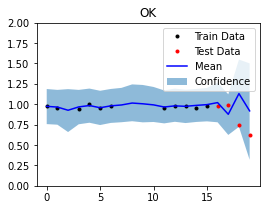

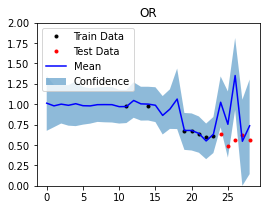

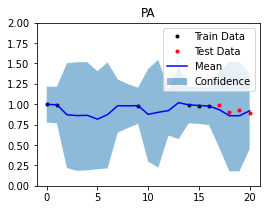

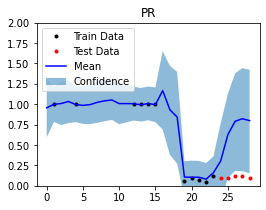

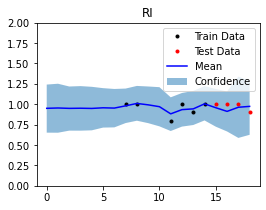

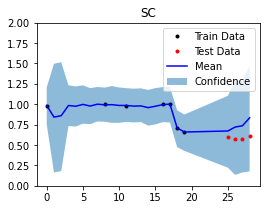

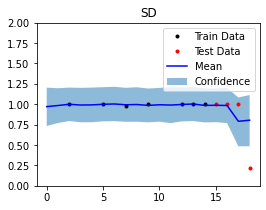

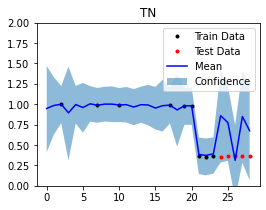

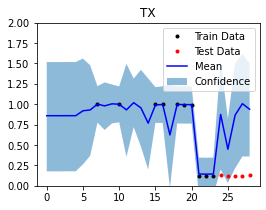

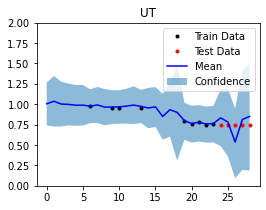

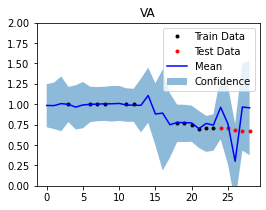

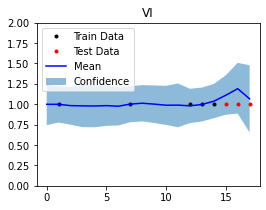

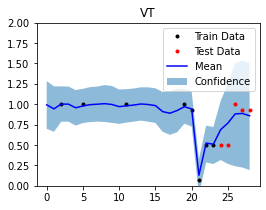

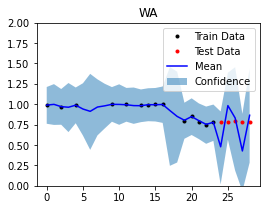

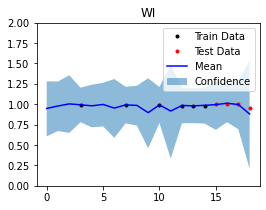

In [ ]:
def plot_ordered(state):
  model.eval()
  likelihood.eval()

  # state data
  # full_state_data = df_ordered.loc[df_ordered['state_x'] == state].sort_values(by=['collection_week'])
  full_state_data = df.loc[df['state_x'] == state].sort_values(by=['collection_week'])
  state_train = train_df_ordered.loc[train_df_ordered['state_x'] == state].sort_values(by=['collection_week'])
  state_test = test_df_ordered.loc[test_df_ordered['state_x'] == state].sort_values(by=['collection_week'])
  if (state_test.shape[0] == 0): # test data may be empty because of the way data is split
    print(state)
    return
  train_x = torch.tensor(state_train['collection_week'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  train_y = torch.tensor(state_train['able_to_obtain_n95_masks'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  test_x = torch.tensor(state_test['collection_week'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)
  test_y = torch.tensor(state_test['able_to_obtain_n95_masks'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)

  # make preds
  with torch.no_grad(), gpytorch.settings.fast_computations(log_prob=False, covar_root_decomposition=False):
    input = torch.cat((torch.tensor(full_state_data['collection_week'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1), 
                        torch.tensor(full_state_data['inpatient_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['icu_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['latitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['longitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                       torch.tensor(full_state_data['new_case'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1)), dim=1)
    predictions = likelihood(model(input))
    mean = predictions.mean

    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.set_title(state)

    # Get upper and lower confidence bounds
    lower, upper = predictions.confidence_region()
    # Plot training data as black dots
    ax.plot(train_x.numpy(), train_y.numpy(), '.k')
    # Plot testing data as red dots
    ax.plot(test_x.numpy(), test_y.numpy(), '.r')
    # Plot predictive means as blue line
    ax.plot(input[:,0].numpy(), predictions.mean[:,2].numpy(), 'b')

    # Shade between the lower and upper confidence bounds
    ax.fill_between(input[:,0].numpy(), lower[:,0].numpy(), upper[:,0].numpy(), alpha=0.5)
    ax.set_ylim([0, 2])
    ax.legend(['Train Data', 'Test Data', 'Mean', 'Confidence'])

for i in state_list:
  plot_ordered(i)

In [ ]:
from sklearn.metrics import mean_squared_error

with torch.no_grad(), gpytorch.settings.fast_computations(log_prob=False, covar_root_decomposition=False):
    test_x_ordered = torch.cat((torch.tensor(test_df_ordered['collection_week'].values, dtype=torch.float).contiguous().view(test_df_ordered.shape[0], 1), 
                        torch.tensor(test_df_ordered['inpatient_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(test_df_ordered.shape[0], 1),
                        torch.tensor(test_df_ordered['icu_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(test_df_ordered.shape[0], 1),
                        torch.tensor(test_df_ordered['latitude'].values, dtype=torch.float).contiguous().view(test_df_ordered.shape[0], 1),
                        torch.tensor(test_df_ordered['longitude'].values, dtype=torch.float).contiguous().view(test_df_ordered.shape[0], 1),
                       torch.tensor(test_df_ordered['new_case'].values, dtype=torch.float).contiguous().view(test_df_ordered.shape[0], 1)), dim=1)
    preds = likelihood(model(test_x_ordered)).mean.numpy()
    true = test_df_ordered[['able_to_obtain_ventilator_supplies', 'able_to_obtain_ventilator_medications', 'able_to_obtain_n95_masks',
                            'able_to_obtain_paprs', 'able_to_obtain_surgical_masks', 'able_to_obtain_eye_protection', 
                            'able_to_obtain_single_use_gowns', 'able_to_obtain_gloves']].to_numpy()
    print(preds.shape, true.shape)
    error = mean_squared_error(preds, true, squared=False)
    print(f"Error: {error}")

(191, 8) (191, 8)
Error: 0.32312137013395537


Train and test with random data split

In [ ]:
df_random = df.sample(frac=1).reset_index(drop=True)
train_df_random = df_random.iloc[:int(df_random.shape[0] * 0.8),:]
test_df_random = df_random.iloc[int(df_random.shape[0] * 0.8):,:]

# training datasets with random split
train_x_random = torch.cat((torch.tensor(train_df_random['collection_week'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1), 
                            torch.tensor(train_df_random['inpatient_beds_used_7_day_sum'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['icu_beds_used_7_day_sum'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['latitude'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['longitude'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['new_case'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1)), dim=1)

train_y_random = torch.cat((torch.tensor(train_df_random['able_to_obtain_ventilator_supplies'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1), 
                            torch.tensor(train_df_random['able_to_obtain_ventilator_medications'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['able_to_obtain_n95_masks'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['able_to_obtain_paprs'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['able_to_obtain_surgical_masks'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['able_to_obtain_eye_protection'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['able_to_obtain_single_use_gowns'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1),
                            torch.tensor(train_df_random['able_to_obtain_gloves'], dtype=torch.float).contiguous().view(train_df_random.shape[0], 1)), dim=1)

print(train_x_random.shape, train_y_random.shape)

torch.Size([873, 6]) torch.Size([873, 8])


In [ ]:
model = MultitaskGPModel(train_x_random, train_y_random, likelihood)

# find model hyperparameters
model.train()
likelihood.train()

# adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) ## modify lr and experiment

# marginal log likelihood loss
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model) ## we can change mll

# training
for i in range(100): #epochs = 100
  optimizer.zero_grad()
  output = model(train_x_random.float())
  loss = -mll(output, train_y_random.float())
  loss.backward()
  print(f"Iter {i}/100 - Loss: {loss.item()}")
  optimizer.step()

Iter 0/100 - Loss: 1.533789873123169
Iter 1/100 - Loss: 1.511277437210083
Iter 2/100 - Loss: 1.4893461465835571
Iter 3/100 - Loss: 1.4679163694381714
Iter 4/100 - Loss: 1.4474952220916748
Iter 5/100 - Loss: 1.4285322427749634
Iter 6/100 - Loss: 1.4079874753952026
Iter 7/100 - Loss: 1.3893872499465942
Iter 8/100 - Loss: 1.3710873126983643
Iter 9/100 - Loss: 1.3529722690582275
Iter 10/100 - Loss: 1.335652470588684
Iter 11/100 - Loss: 1.3187295198440552
Iter 12/100 - Loss: 1.302912712097168
Iter 13/100 - Loss: 1.2869309186935425
Iter 14/100 - Loss: 1.2707480192184448
Iter 15/100 - Loss: 1.2559808492660522
Iter 16/100 - Loss: 1.2408777475357056
Iter 17/100 - Loss: 1.2263646125793457
Iter 18/100 - Loss: 1.212672233581543
Iter 19/100 - Loss: 1.1986732482910156
Iter 20/100 - Loss: 1.1850672960281372
Iter 21/100 - Loss: 1.1721408367156982
Iter 22/100 - Loss: 1.1591051816940308
Iter 23/100 - Loss: 1.1464385986328125
Iter 24/100 - Loss: 1.1339858770370483
Iter 25/100 - Loss: 1.121386170387268
It


Values to predict:

able_to_obtain_ventilator_supplies

able_to_obtain_ventilator_medications

able_to_obtain_n95_masks

able_to_obtain_paprs

able_to_obtain_surgical_masks

able_to_obtain_eye_protection

able_to_obtain_single_use_gowns

able_to_obtain_gloves


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

WVWY


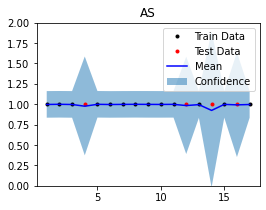

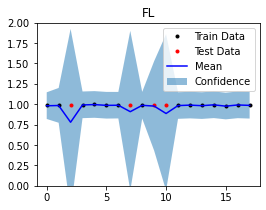

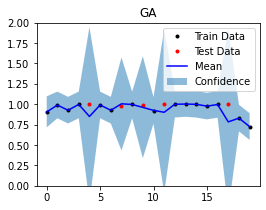

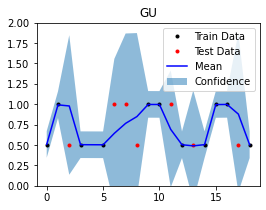

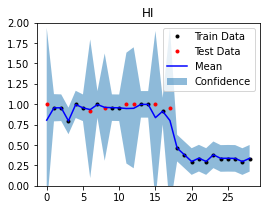

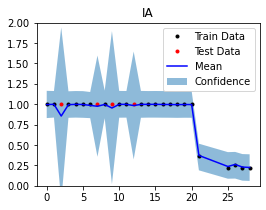

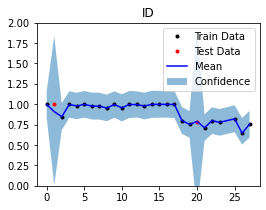

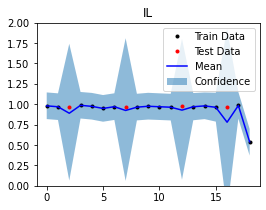

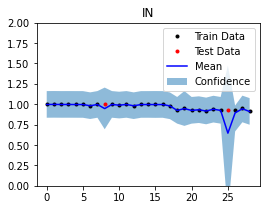

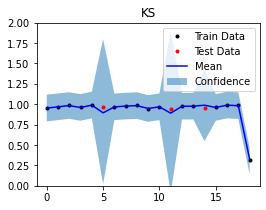

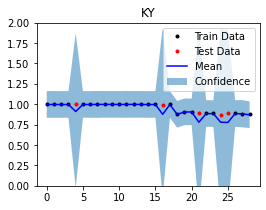

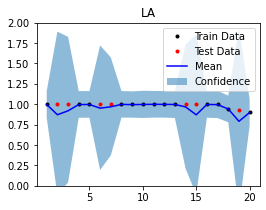

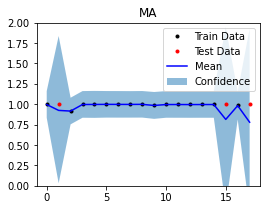

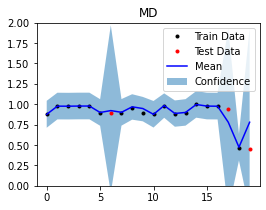

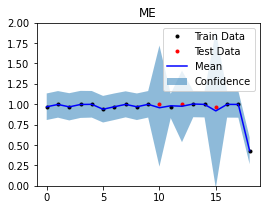

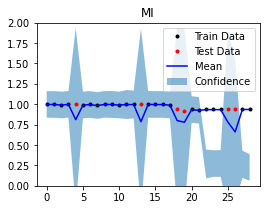

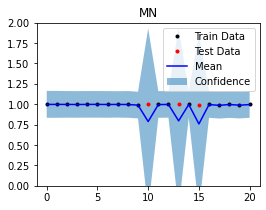

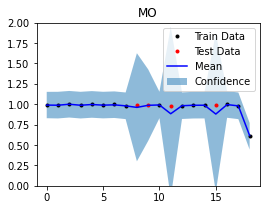

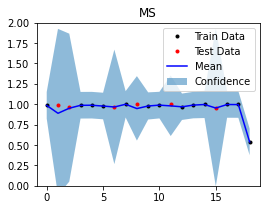

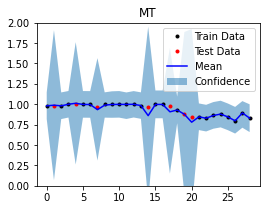

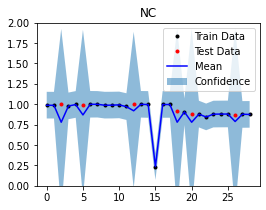

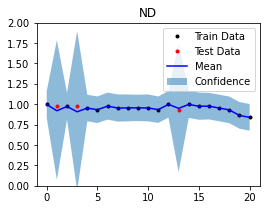

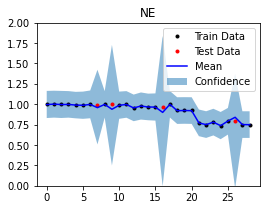

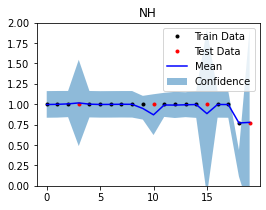

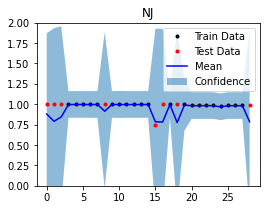

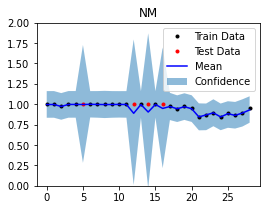

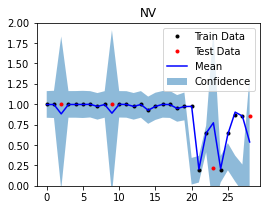

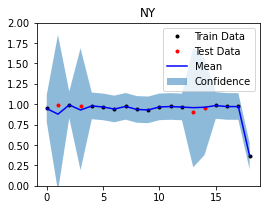

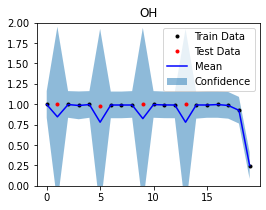

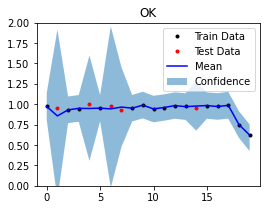

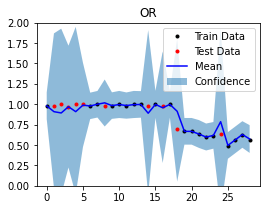

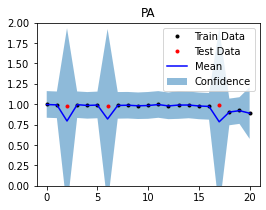

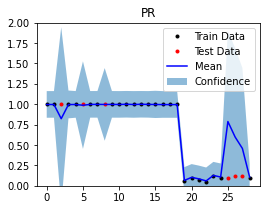

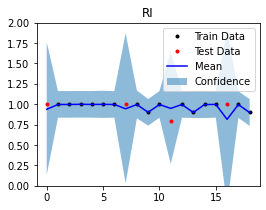

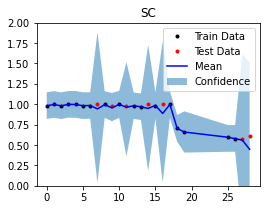

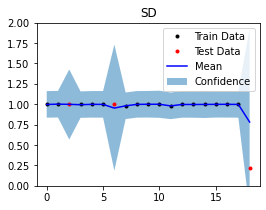

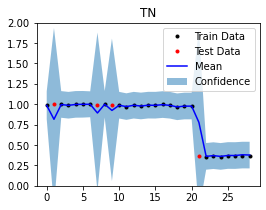

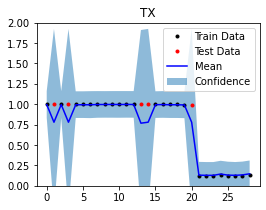

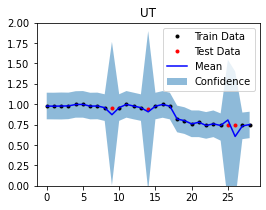

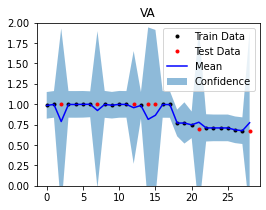

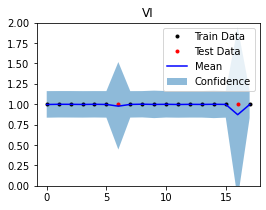

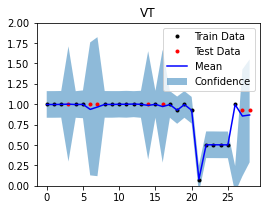

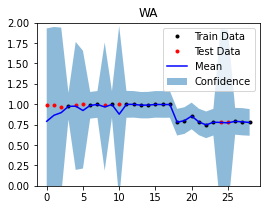

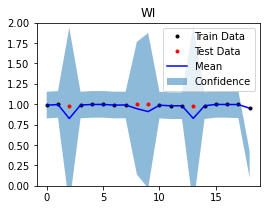

In [ ]:
### PREDICT able_to_obtain_n95_masks

def plot_random(state):
  model.eval()
  likelihood.eval()

  # state data
  # full_state_data = df_ordered.loc[df_ordered['state_x'] == state].sort_values(by=['collection_week'])
  full_state_data = df.loc[df['state_x'] == state].sort_values(by=['collection_week'])
  state_train = train_df_random.loc[train_df_random['state_x'] == state].sort_values(by=['collection_week'])
  state_test = test_df_random.loc[test_df_random['state_x'] == state].sort_values(by=['collection_week'])
  if (state_test.shape[0] == 0): # test data may be empty because of the way data is split
    print(state)
    return
  train_x = torch.tensor(state_train['collection_week'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  train_y = torch.tensor(state_train['able_to_obtain_n95_masks'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  test_x = torch.tensor(state_test['collection_week'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)
  test_y = torch.tensor(state_test['able_to_obtain_n95_masks'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)

  # make preds
  with torch.no_grad(), gpytorch.settings.fast_computations(log_prob=False, covar_root_decomposition=False):
    input = torch.cat((torch.tensor(full_state_data['collection_week'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1), 
                        torch.tensor(full_state_data['inpatient_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['icu_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['latitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['longitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                       torch.tensor(full_state_data['new_case'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1)), dim=1)
    predictions = likelihood(model(input))
    mean = predictions.mean

    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.set_title(state)

    # Get upper and lower confidence bounds
    lower, upper = predictions.confidence_region()
    # Plot training data as black dots
    ax.plot(train_x.numpy(), train_y.numpy(), '.k')
    # Plot testing data as red dots
    ax.plot(test_x.numpy(), test_y.numpy(), '.r')
    # Plot predictive means as blue line
    ax.plot(input[:,0].numpy(), predictions.mean[:,2].numpy(), 'b')

    # Shade between the lower and upper confidence bounds
    ax.fill_between(input[:,0].numpy(), lower[:,0].numpy(), upper[:,0].numpy(), alpha=0.5)
    ax.set_ylim([0, 2])
    ax.legend(['Train Data', 'Test Data', 'Mean', 'Confidence'])

for i in state_list:
  plot_random(i)

In [ ]:
with torch.no_grad(), gpytorch.settings.fast_computations(log_prob=False, covar_root_decomposition=False):
    test_x_ordered = torch.cat((torch.tensor(test_df_random['collection_week'].values, dtype=torch.float).contiguous().view(test_df_random.shape[0], 1), 
                        torch.tensor(test_df_random['inpatient_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(test_df_random.shape[0], 1),
                        torch.tensor(test_df_random['icu_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(test_df_random.shape[0], 1),
                        torch.tensor(test_df_random['latitude'].values, dtype=torch.float).contiguous().view(test_df_random.shape[0], 1),
                        torch.tensor(test_df_random['longitude'].values, dtype=torch.float).contiguous().view(test_df_random.shape[0], 1),
                       torch.tensor(test_df_random['new_case'].values, dtype=torch.float).contiguous().view(test_df_random.shape[0], 1)), dim=1)
    preds = likelihood(model(test_x_ordered)).mean.numpy()
    true = test_df_random[['able_to_obtain_ventilator_supplies', 'able_to_obtain_ventilator_medications', 'able_to_obtain_n95_masks',
                            'able_to_obtain_paprs', 'able_to_obtain_surgical_masks', 'able_to_obtain_eye_protection', 
                            'able_to_obtain_single_use_gowns', 'able_to_obtain_gloves']].to_numpy()
    print(preds.shape, true.shape)
    error = mean_squared_error(preds, true)**0.5
    print(f"Error: {error}")

(219, 8) (219, 8)
Error: 0.19034017500631542


In [ ]:
## PREDICT able_to_obtain_ventilator_medications

def plot_ordered(state):
  model.eval()
  likelihood.eval()

  # state data
  # full_state_data = df_ordered.loc[df_ordered['state_x'] == state].sort_values(by=['collection_week'])
  full_state_data = df.loc[df['state_x'] == state].sort_values(by=['collection_week'])
  state_train = train_df_random.loc[train_df_random['state_x'] == state].sort_values(by=['collection_week'])
  state_test = test_df_random.loc[test_df_random['state_x'] == state].sort_values(by=['collection_week'])
  if (state_test.shape[0] == 0): # test data may be empty because of the way data is split
    print(state)
    return
  train_x = torch.tensor(state_train['collection_week'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  train_y = torch.tensor(state_train['able_to_obtain_ventilator_medications'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  test_x = torch.tensor(state_test['collection_week'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)
  test_y = torch.tensor(state_test['able_to_obtain_ventilator_medications'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)

  # make preds
  with torch.no_grad(), gpytorch.settings.fast_computations(log_prob=False, covar_root_decomposition=False):
    input = torch.cat((torch.tensor(full_state_data['collection_week'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1), 
                        torch.tensor(full_state_data['inpatient_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['icu_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['latitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['longitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1)), dim=1)
    predictions = likelihood(model(input))
    mean = predictions.mean

    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.set_title(state)

    # Get upper and lower confidence bounds
    lower, upper = predictions.confidence_region()
    # Plot training data as black dots
    ax.plot(train_x.numpy(), train_y.numpy(), '.k')
    # Plot testing data as red dots
    ax.plot(test_x.numpy(), test_y.numpy(), '.r')
    # Plot predictive means as blue line
    ax.plot(input[:,0].numpy(), predictions.mean[:,2].numpy(), 'b')

    # Shade between the lower and upper confidence bounds
    ax.fill_between(input[:,0].numpy(), lower[:,0].numpy(), upper[:,0].numpy(), alpha=0.5)
    ax.set_ylim([0, 2])
    ax.legend(['Train Data', 'Test Data', 'Mean', 'Confidence'])

for i in state_list:
  plot_ordered(i)

RuntimeError: ignored

In [ ]:
## PREDICT able_to_obtain_n95_masks

def plot_ordered(state):
  model.eval()
  likelihood.eval()

  # state data
  # full_state_data = df_ordered.loc[df_ordered['state_x'] == state].sort_values(by=['collection_week'])
  full_state_data = df.loc[df['state_x'] == state].sort_values(by=['collection_week'])
  state_train = train_df_random.loc[train_df_random['state_x'] == state].sort_values(by=['collection_week'])
  state_test = test_df_random.loc[test_df_random['state_x'] == state].sort_values(by=['collection_week'])
  if (state_test.shape[0] == 0): # test data may be empty because of the way data is split
    print(state)
    return
  train_x = torch.tensor(state_train['collection_week'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  train_y = torch.tensor(state_train['able_to_obtain_n95_masks'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  test_x = torch.tensor(state_test['collection_week'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)
  test_y = torch.tensor(state_test['able_to_obtain_n95_masks'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)

  # make preds
  with torch.no_grad(), gpytorch.settings.fast_computations(log_prob=False, covar_root_decomposition=False):
    input = torch.cat((torch.tensor(full_state_data['collection_week'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1), 
                        torch.tensor(full_state_data['inpatient_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['icu_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['latitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['longitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1)), dim=1)
    predictions = likelihood(model(input))
    mean = predictions.mean

    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.set_title(state)

    # Get upper and lower confidence bounds
    lower, upper = predictions.confidence_region()
    # Plot training data as black dots
    ax.plot(train_x.numpy(), train_y.numpy(), '.k')
    # Plot testing data as red dots
    ax.plot(test_x.numpy(), test_y.numpy(), '.r')
    # Plot predictive means as blue line
    ax.plot(input[:,0].numpy(), predictions.mean[:,2].numpy(), 'b')

    # Shade between the lower and upper confidence bounds
    ax.fill_between(input[:,0].numpy(), lower[:,0].numpy(), upper[:,0].numpy(), alpha=0.5)
    ax.set_ylim([0, 2])
    ax.legend(['Train Data', 'Test Data', 'Mean', 'Confidence'])

for i in state_list:
  plot_ordered(i)

In [ ]:
## PREDICT able_to_obtain_paprs

def plot_ordered(state):
  model.eval()
  likelihood.eval()

  # state data
  # full_state_data = df_ordered.loc[df_ordered['state_x'] == state].sort_values(by=['collection_week'])
  full_state_data = df.loc[df['state_x'] == state].sort_values(by=['collection_week'])
  state_train = train_df_random.loc[train_df_random['state_x'] == state].sort_values(by=['collection_week'])
  state_test = test_df_random.loc[test_df_random['state_x'] == state].sort_values(by=['collection_week'])
  if (state_test.shape[0] == 0): # test data may be empty because of the way data is split
    print(state)
    return
  train_x = torch.tensor(state_train['collection_week'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  train_y = torch.tensor(state_train['able_to_obtain_paprs'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  test_x = torch.tensor(state_test['collection_week'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)
  test_y = torch.tensor(state_test['able_to_obtain_paprs'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)

  # make preds
  with torch.no_grad(), gpytorch.settings.fast_computations(log_prob=False, covar_root_decomposition=False):
    input = torch.cat((torch.tensor(full_state_data['collection_week'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1), 
                        torch.tensor(full_state_data['inpatient_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['icu_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['latitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['longitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1)), dim=1)
    predictions = likelihood(model(input))
    mean = predictions.mean

    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.set_title(state)

    # Get upper and lower confidence bounds
    lower, upper = predictions.confidence_region()
    # Plot training data as black dots
    ax.plot(train_x.numpy(), train_y.numpy(), '.k')
    # Plot testing data as red dots
    ax.plot(test_x.numpy(), test_y.numpy(), '.r')
    # Plot predictive means as blue line
    ax.plot(input[:,0].numpy(), predictions.mean[:,2].numpy(), 'b')

    # Shade between the lower and upper confidence bounds
    ax.fill_between(input[:,0].numpy(), lower[:,0].numpy(), upper[:,0].numpy(), alpha=0.5)
    ax.set_ylim([0, 2])
    ax.legend(['Train Data', 'Test Data', 'Mean', 'Confidence'])

for i in state_list:
  plot_ordered(i)

In [ ]:
## PREDICT able_to_obtain_surgical_masks

def plot_ordered(state):
  model.eval()
  likelihood.eval()

  # state data
  # full_state_data = df_ordered.loc[df_ordered['state_x'] == state].sort_values(by=['collection_week'])
  full_state_data = df.loc[df['state_x'] == state].sort_values(by=['collection_week'])
  state_train = train_df_random.loc[train_df_random['state_x'] == state].sort_values(by=['collection_week'])
  state_test = test_df_random.loc[test_df_random['state_x'] == state].sort_values(by=['collection_week'])
  if (state_test.shape[0] == 0): # test data may be empty because of the way data is split
    print(state)
    return
  train_x = torch.tensor(state_train['collection_week'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  train_y = torch.tensor(state_train['able_to_obtain_surgical_masks'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  test_x = torch.tensor(state_test['collection_week'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)
  test_y = torch.tensor(state_test['able_to_obtain_surgical_masks'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)

  # make preds
  with torch.no_grad(), gpytorch.settings.fast_computations(log_prob=False, covar_root_decomposition=False):
    input = torch.cat((torch.tensor(full_state_data['collection_week'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1), 
                        torch.tensor(full_state_data['inpatient_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['icu_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['latitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['longitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1)), dim=1)
    predictions = likelihood(model(input))
    mean = predictions.mean

    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.set_title(state)

    # Get upper and lower confidence bounds
    lower, upper = predictions.confidence_region()
    # Plot training data as black dots
    ax.plot(train_x.numpy(), train_y.numpy(), '.k')
    # Plot testing data as red dots
    ax.plot(test_x.numpy(), test_y.numpy(), '.r')
    # Plot predictive means as blue line
    ax.plot(input[:,0].numpy(), predictions.mean[:,2].numpy(), 'b')

    # Shade between the lower and upper confidence bounds
    ax.fill_between(input[:,0].numpy(), lower[:,0].numpy(), upper[:,0].numpy(), alpha=0.5)
    ax.set_ylim([0, 2])
    ax.legend(['Train Data', 'Test Data', 'Mean', 'Confidence'])

for i in state_list:
  plot_ordered(i)

In [ ]:
## PREDICT able_to_obtain_eye_protection

def plot_ordered(state):
  model.eval()
  likelihood.eval()

  # state data
  # full_state_data = df_ordered.loc[df_ordered['state_x'] == state].sort_values(by=['collection_week'])
  full_state_data = df.loc[df['state_x'] == state].sort_values(by=['collection_week'])
  state_train = train_df_random.loc[train_df_random['state_x'] == state].sort_values(by=['collection_week'])
  state_test = test_df_random.loc[test_df_random['state_x'] == state].sort_values(by=['collection_week'])
  if (state_test.shape[0] == 0): # test data may be empty because of the way data is split
    print(state)
    return
  train_x = torch.tensor(state_train['collection_week'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  train_y = torch.tensor(state_train['able_to_obtain_eye_protection'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  test_x = torch.tensor(state_test['collection_week'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)
  test_y = torch.tensor(state_test['able_to_obtain_eye_protection'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)

  # make preds
  with torch.no_grad(), gpytorch.settings.fast_computations(log_prob=False, covar_root_decomposition=False):
    input = torch.cat((torch.tensor(full_state_data['collection_week'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1), 
                        torch.tensor(full_state_data['inpatient_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['icu_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['latitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['longitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1)), dim=1)
    predictions = likelihood(model(input))
    mean = predictions.mean

    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.set_title(state)

    # Get upper and lower confidence bounds
    lower, upper = predictions.confidence_region()
    # Plot training data as black dots
    ax.plot(train_x.numpy(), train_y.numpy(), '.k')
    # Plot testing data as red dots
    ax.plot(test_x.numpy(), test_y.numpy(), '.r')
    # Plot predictive means as blue line
    ax.plot(input[:,0].numpy(), predictions.mean[:,2].numpy(), 'b')

    # Shade between the lower and upper confidence bounds
    ax.fill_between(input[:,0].numpy(), lower[:,0].numpy(), upper[:,0].numpy(), alpha=0.5)
    ax.set_ylim([0, 2])
    ax.legend(['Train Data', 'Test Data', 'Mean', 'Confidence'])

for i in state_list:
  plot_ordered(i)

In [ ]:
## PREDICT able_to_obtain_single_use_gowns

def plot_ordered(state):
  model.eval()
  likelihood.eval()

  # state data
  # full_state_data = df_ordered.loc[df_ordered['state_x'] == state].sort_values(by=['collection_week'])
  full_state_data = df.loc[df['state_x'] == state].sort_values(by=['collection_week'])
  state_train = train_df_random.loc[train_df_random['state_x'] == state].sort_values(by=['collection_week'])
  state_test = test_df_random.loc[test_df_random['state_x'] == state].sort_values(by=['collection_week'])
  if (state_test.shape[0] == 0): # test data may be empty because of the way data is split
    print(state)
    return
  train_x = torch.tensor(state_train['collection_week'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  train_y = torch.tensor(state_train['able_to_obtain_single_use_gowns'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  test_x = torch.tensor(state_test['collection_week'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)
  test_y = torch.tensor(state_test['able_to_obtain_single_use_gowns'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)

  # make preds
  with torch.no_grad(), gpytorch.settings.fast_computations(log_prob=False, covar_root_decomposition=False):
    input = torch.cat((torch.tensor(full_state_data['collection_week'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1), 
                        torch.tensor(full_state_data['inpatient_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['icu_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['latitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['longitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1)), dim=1)
    predictions = likelihood(model(input))
    mean = predictions.mean

    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.set_title(state)

    # Get upper and lower confidence bounds
    lower, upper = predictions.confidence_region()
    # Plot training data as black dots
    ax.plot(train_x.numpy(), train_y.numpy(), '.k')
    # Plot testing data as red dots
    ax.plot(test_x.numpy(), test_y.numpy(), '.r')
    # Plot predictive means as blue line
    ax.plot(input[:,0].numpy(), predictions.mean[:,2].numpy(), 'b')

    # Shade between the lower and upper confidence bounds
    ax.fill_between(input[:,0].numpy(), lower[:,0].numpy(), upper[:,0].numpy(), alpha=0.5)
    ax.set_ylim([0, 2])
    ax.legend(['Train Data', 'Test Data', 'Mean', 'Confidence'])

for i in state_list:
  plot_ordered(i)

In [ ]:
## PREDICT able_to_obtain_gloves

def plot_ordered(state):
  model.eval()
  likelihood.eval()

  # state data
  # full_state_data = df_ordered.loc[df_ordered['state_x'] == state].sort_values(by=['collection_week'])
  full_state_data = df.loc[df['state_x'] == state].sort_values(by=['collection_week'])
  state_train = train_df_random.loc[train_df_random['state_x'] == state].sort_values(by=['collection_week'])
  state_test = test_df_random.loc[test_df_random['state_x'] == state].sort_values(by=['collection_week'])
  if (state_test.shape[0] == 0): # test data may be empty because of the way data is split
    print(state)
    return
  train_x = torch.tensor(state_train['collection_week'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  train_y = torch.tensor(state_train['able_to_obtain_gloves'].values, dtype=torch.float).contiguous().view(state_train.shape[0], 1)
  test_x = torch.tensor(state_test['collection_week'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)
  test_y = torch.tensor(state_test['able_to_obtain_gloves'].values, dtype=torch.float).contiguous().view(state_test.shape[0], 1)

  # make preds
  with torch.no_grad(), gpytorch.settings.fast_computations(log_prob=False, covar_root_decomposition=False):
    input = torch.cat((torch.tensor(full_state_data['collection_week'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1), 
                        torch.tensor(full_state_data['inpatient_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['icu_beds_used_7_day_sum'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['latitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1),
                        torch.tensor(full_state_data['longitude'].values, dtype=torch.float).contiguous().view(full_state_data.shape[0], 1)), dim=1)
    predictions = likelihood(model(input))
    mean = predictions.mean

    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.set_title(state)

    # Get upper and lower confidence bounds
    lower, upper = predictions.confidence_region()
    # Plot training data as black dots
    ax.plot(train_x.numpy(), train_y.numpy(), '.k')
    # Plot testing data as red dots
    ax.plot(test_x.numpy(), test_y.numpy(), '.r')
    # Plot predictive means as blue line
    ax.plot(input[:,0].numpy(), predictions.mean[:,2].numpy(), 'b')

    # Shade between the lower and upper confidence bounds
    ax.fill_between(input[:,0].numpy(), lower[:,0].numpy(), upper[:,0].numpy(), alpha=0.5)
    ax.set_ylim([0, 2])
    ax.legend(['Train Data', 'Test Data', 'Mean', 'Confidence'])

for i in state_list:
  plot_ordered(i)